# Librerias

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from heatmap import heatmap, corrplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Data Set / Exploración

### El dataset ya se encuentra completo y todas sus variables son categoricas por lo cual no puedo realizar las pruebas de normalidad y demás graficas ya que no hace sentido

In [3]:
df =pd.read_csv("Video_games_esrb_rating.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [4]:
labelencoder = LabelEncoder()
ratings = df["esrb_rating"]
ratings = labelencoder.fit_transform(ratings)

In [5]:
df["esrb_ratings"] = ratings

# Matrix de Corelación

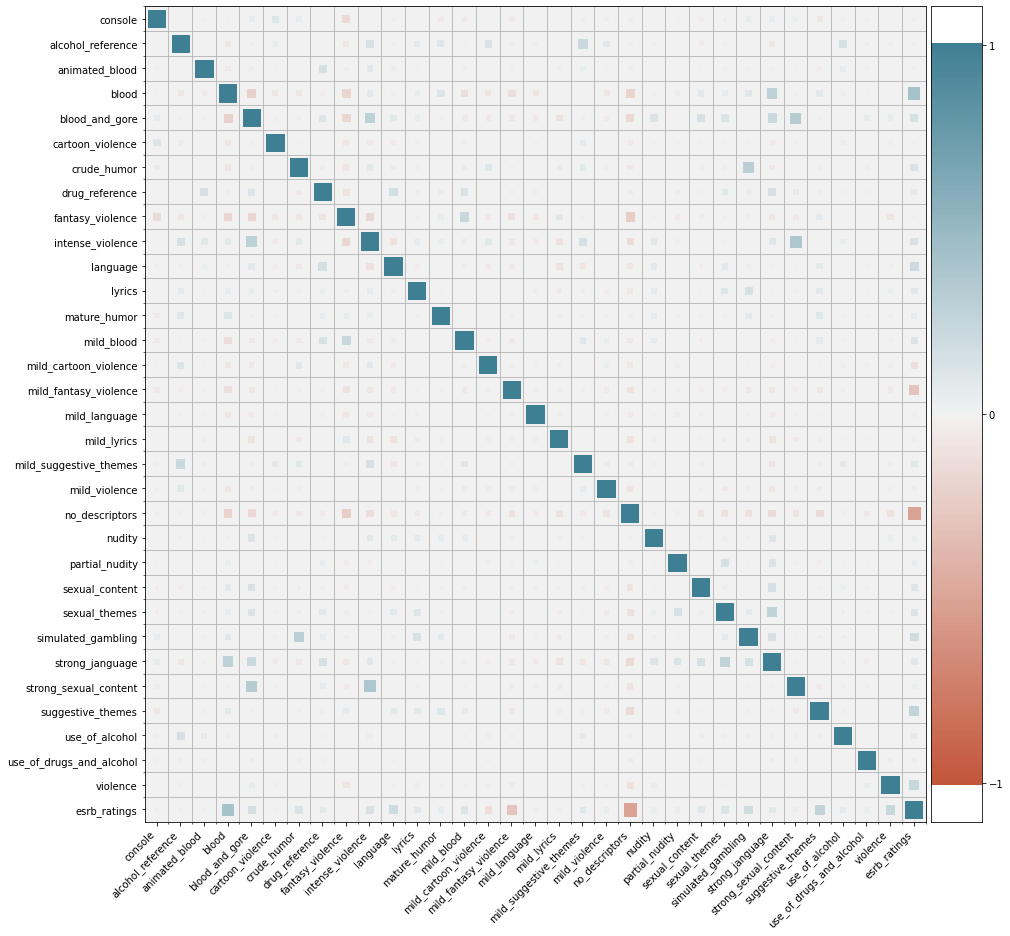

In [6]:
plt.figure(figsize=(15, 15))
corrplot(df.corr(), size_scale=300);

# Carga de Datos

In [7]:
df =pd.read_csv("Video_games_esrb_rating.csv")
df_test= pd.read_csv("test_esrb.csv")
df

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


# Limpieza de Datos

In [8]:
def data_wrangling(df):
    df = df.copy()
    df = df.drop('title', axis=1)
    df = df.sample(frac=1.0, random_state=1).reset_index(drop=True)
    y = df['esrb_rating']
    X = df.drop('esrb_rating', axis=1)
    
    return X, y

In [9]:
X_train, y_train = data_wrangling(df)
X_test, y_test = data_wrangling(df_test)

In [10]:
X_train.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# Diccionario de Modelos y Entrenamiento

In [11]:
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "           Stochastic Gradient Descent": SGDClassifier(),
    "                   Logistic Regression":LogisticRegression(),
}
for name, model in models.items():
    model.fit(X_train, y_train)

# Score de Modelos

## Train

In [12]:
for name, model in models.items():
    print(name + " Score: {:.3f}%".format(model.score(X_train, y_train) * 100))

                   K-Nearest Neighbors Score: 87.124%
                         Decision Tree Score: 92.454%
                         Random Forest Score: 92.454%
           Stochastic Gradient Descent Score: 85.224%
                   Logistic Regression Score: 85.699%


## Test

In [13]:
for name, model in models.items():
    print(name + " Score: {:.3f}%".format(model.score(X_test, y_test) * 100))

                   K-Nearest Neighbors Score: 78.800%
                         Decision Tree Score: 84.000%
                         Random Forest Score: 84.400%
           Stochastic Gradient Descent Score: 82.200%
                   Logistic Regression Score: 79.800%


# Matrix de Confusión

## Train

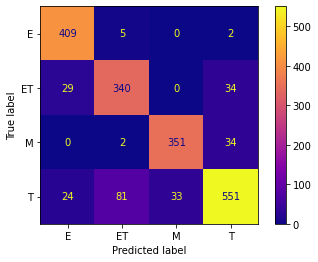

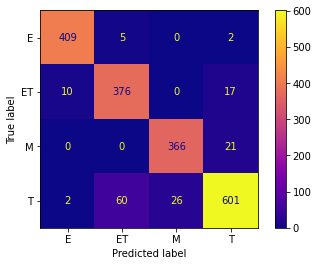

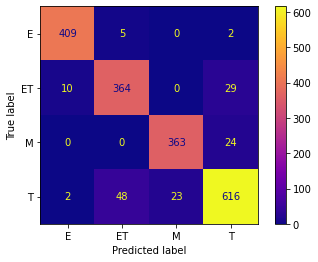

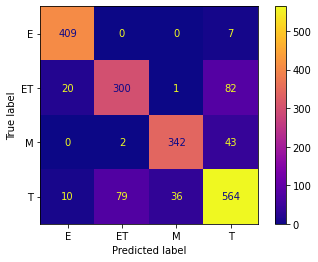

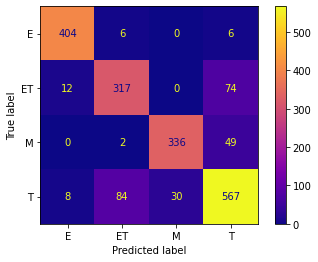

In [14]:
for name, model in models.items():
    plot_confusion_matrix(model, X_train, y_train, cmap='plasma')
  

## Test

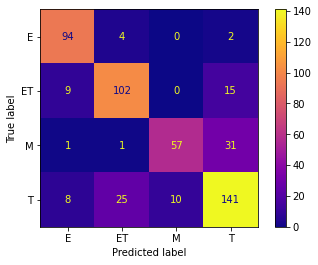

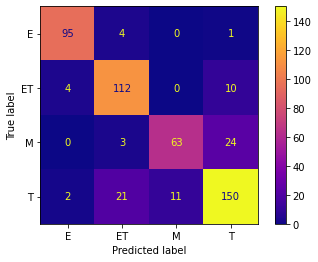

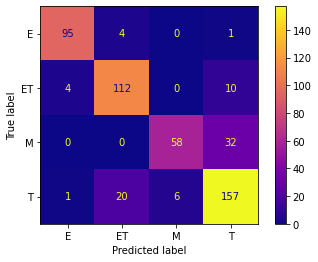

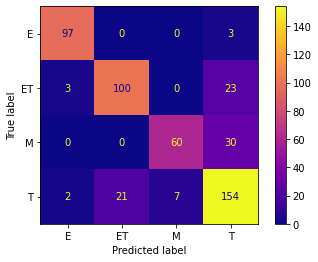

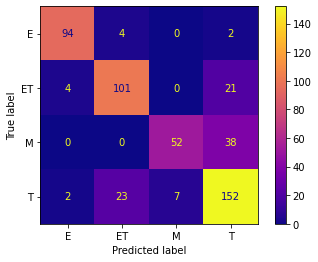

In [15]:
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, cmap='plasma')

# Rendiento de Modelos

## Train

In [16]:
for name, model in models.items():
    y_scores = cross_val_predict(model, X_train, y_train, cv=10)
    print(metrics.classification_report(y_train, y_scores, digits=3))

              precision    recall  f1-score   support

           E      0.831     0.981     0.900       416
          ET      0.734     0.794     0.763       403
           M      0.870     0.863     0.866       387
           T      0.839     0.711     0.770       689

    accuracy                          0.819      1895
   macro avg      0.818     0.837     0.825      1895
weighted avg      0.821     0.819     0.817      1895

              precision    recall  f1-score   support

           E      0.935     0.974     0.954       416
          ET      0.740     0.819     0.777       403
           M      0.869     0.871     0.870       387
           T      0.836     0.762     0.797       689

    accuracy                          0.843      1895
   macro avg      0.845     0.856     0.850      1895
weighted avg      0.844     0.843     0.842      1895

              precision    recall  f1-score   support

           E      0.938     0.974     0.955       416
          ET      0.7

## Test

In [17]:
for name, model in models.items():
    y_scores = cross_val_predict(model, X_test, y_test, cv=10)
    print(metrics.classification_report(y_test, y_scores, digits=3))

              precision    recall  f1-score   support

           E      0.708     0.970     0.819       100
          ET      0.720     0.817     0.766       126
           M      0.890     0.722     0.798        90
           T      0.864     0.690     0.767       184

    accuracy                          0.784       500
   macro avg      0.796     0.800     0.787       500
weighted avg      0.801     0.784     0.783       500

              precision    recall  f1-score   support

           E      0.865     0.960     0.910       100
          ET      0.808     0.802     0.805       126
           M      0.819     0.756     0.786        90
           T      0.818     0.804     0.811       184

    accuracy                          0.826       500
   macro avg      0.827     0.830     0.828       500
weighted avg      0.825     0.826     0.825       500

              precision    recall  f1-score   support

           E      0.857     0.960     0.906       100
          ET      0.7